<a href="https://colab.research.google.com/github/arjunkrishnasr/social-network-analytics-lab-da/blob/main/22MCB0038_Arjun_Krishna_S_R_Girwan_Newmann_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Girvan-Newman Algorithm in community detection**

**22MCB0038**

**Arjun Krishna S R**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:

def girvan_newman(G):
    # Create a copy of the graph to preserve the original structure
    G_copy = G.copy()
    
    # List to store the communities
    communities = []
    
    while G_copy.number_of_edges() > 0:
        # Calculate the betweenness centrality of all edges in the current graph
        edge_betweenness = nx.edge_betweenness_centrality(G_copy)
        
        # Find the edge(s) with the highest betweenness centrality
        max_betweenness = max(edge_betweenness.values())
        edges_with_max_betweenness = [e for e, b in edge_betweenness.items() if b == max_betweenness]
        
        # Remove the edge(s) with the highest betweenness centrality
        for edge in edges_with_max_betweenness:
            G_copy.remove_edge(*edge)
        
        # Find the connected components in the updated graph
        connected_components = nx.connected_components(G_copy)
        
        # Add the connected components to the list of communities
        communities.extend(connected_components)
    
    return communities

In [6]:
# Create a random graph for demonstration
G = nx.erdos_renyi_graph(n=50, p=0.1)

In [8]:
# Perform community detection using Girvan-Newman algorithm
detected_communities = girvan_newman(G)

In [9]:
# Visualize the graph and detected communities
pos = nx.spring_layout(G, seed=42)

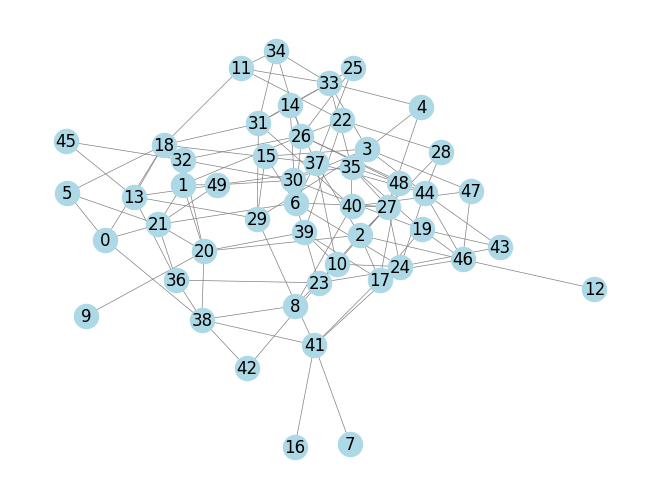

In [10]:
# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=0.5)

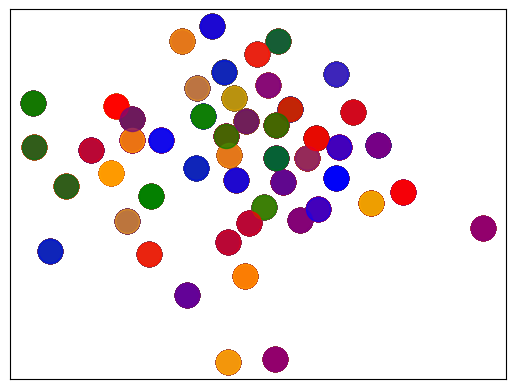

In [11]:
# Draw the detected communities
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, community in enumerate(detected_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i % len(colors)], alpha=0.7)